## Purpose - Scaled Age Error Investigation

- To demonstrate that there is a significant structure in the relationship between the log mass `lnM` inferred in and the error in the label `e_lnM` reported by Ness+(2016).

- To provide information for deciding whether or not it is physically reasonable to infer an age error in Bird+(2018) that is scaled by `e_lnM` rather than a simple characteristic error for all stars.


In [1]:
import run_model_data as rmd
import astropy
from DiskSpeedDating import xmatched
import interpolate_age2017_r14
import numpy as np

In [6]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
# Load in Data with RC pristine sample from Yuan-Sen 
xm_cat = xmatched.load_data(rmd.dr_filename['14viz_RV_dper_DR2'])  # parent catalog of xmatched data
data, all_cuts_boolmask = rmd.fit_model(DR='14viz_RV_dper_DR2', ret_data=True, RCpristine=True)

{'obs_taurange': None, 'nstart': 500, 'tmin': 0.2, 'afe_cut': None, 'tdage': 10.0, '_indx': 24, 'mass_correction': None, 'age0': 3.5, 'steps': 1000, 'RCpristine': True, 'ret_data': True, 'sigtau_scale': None, 'model': <class 'DiskSpeedDating.gen_Ws_tau.FixedLog_hotdisk'>, 'DR': '14viz_RV_dper_DR2', 'ttau': (0.05, 13.5)}
18363 records found in xmatched data
Given cuts: [('chi2', <built-in function lt>, 2.0), ('ADDL_LOGG_CUT', <built-in function gt>, 0.5), ('RC_DM', <built-in function gt>, 8.49), ('pmra', <built-in function gt>, -1000.0), ('pmdec', <built-in function gt>, -1000.0), 'pristine RC from YS']
N:11454 stars included in obs. data set
11454 stars made cut
Max observed age is: 53.5805654315 Gyr
True tau range: 0.05 -- 13.5
Obs tau range: 0.1 -- 70.0


In [5]:
xm_data = xm_cat['xmatched']   # also derived velocities etc. in xm_cat dict

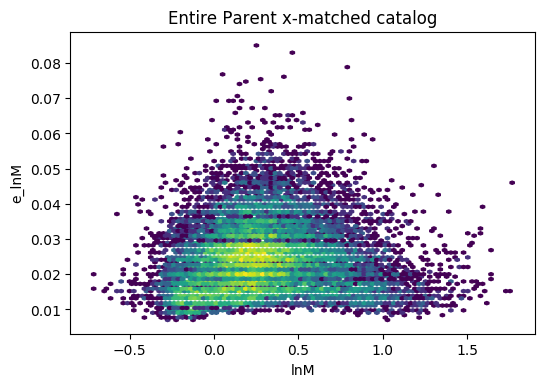

In [13]:
plt.hexbin(xm_data['lnM'], xm_data['e_lnM'], bins='log', mincnt=1)
plt.ylabel('e_lnM')
plt.xlabel('lnM')
plt.title('Entire Parent x-matched catalog')

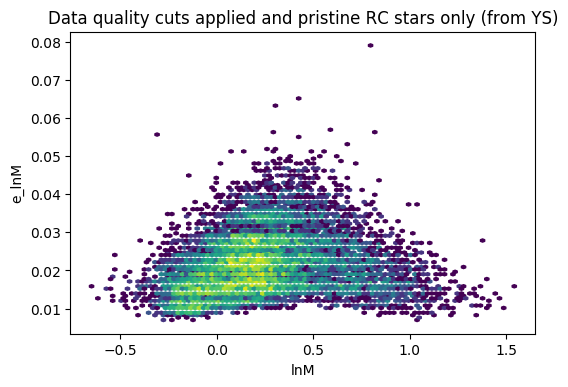

In [14]:
plt.hexbin(xm_data['lnM'][all_cuts_boolmask], xm_data['e_lnM'][all_cuts_boolmask], bins='log', mincnt=1)
plt.ylabel('e_lnM')
plt.xlabel('lnM')
plt.title('Data quality cuts applied and pristine RC stars only (from YS)')

### Thoughts for the 2 plots above

- The label errors are smallest at the extreme ends of the mass range (both low and high mass).
  The mass error peaks towards lnM ~ 0.4.

- Applying the data quality cuts and choosing only RCpristine stars does not change the take-away message

#### Question

Are the reported `e_lnM` simply the mass error from the APOKASC training sample? I think so because the APOKASC catalog has the same relationship between mass_error and mass.

##### Related Thought
The new APOKASC catalog (v2) is out with a different relationship between mass and mass_error and for many more stars. I *highly* suggest that someone repeats the age inferences of Ness+(2016) using the larger, and presumably better, APOKASC training set and then applies it to DR14 (along with proto-DR15). I'd like to be involved in this but likely in a supporting, rather than leading, role. This would be an incredibly valuable catalog given Gaia DR2. Yes, LOTS of people will release ages for DR2 stars but they will only be reliable for stars with very precise parallax measurments. This would still be the largest volume catalog of ages out there. 

### Possibilities or What to do with the age error term

#### Assumption

In the discussion below, I have assummed a one-to-one correpsondance between the error in the mass inference and the resulting error in the age determination.
This is true if two conditions are met: (1) that the stellar evolutionary state is known (I think this is fair since we are using only RC stars)
and (2) that the metallicity of the star is well-known (i.e., the measurement error is small compared to the necessary change in metallicity to appreciably change the derived age given a mass); (2) is a fine assumption given the median error in metallcity is < 0.01 dex!

When (1) and (2) are met, then there exists a linear or quasi-linear relationship between logMass and logAge given a choice of [Fe/H]. 

Thus, it is OK to say that every e_lnM has a corresponding e_lnAge and the relationship is one-to-one and monotonic.

#### Likelihood

One term in the LH is probability of Ness+ inferring an age (this is treated as an observation using the one-to-one mass to age relationship; lnMass -> lnAge)  given a true age and an unknown age error. We specify this probability as a normal in lnAge.

$P(\log{\hat{\tau}} | \log{\tau}, \sigma_{\tau})$

##### 3 options

- A) $\sigma_{\tau}$ is a single number for the entire sample, representing the characteristic age error. 
     This is what we have been doing.
- B) $\sigma_{\tau}$ represents the inferred age error for stars with the median label error (`e_lnM`).
     Each star $i$ would then have a  $(\sigma_{\tau})_i$ scaled using the reported error in the label:
     
     $$(\sigma_{\tau})_i = \sigma_{\tau} * \frac{(\mathrm{e\_lnM})_i}{\mathrm{median(\mathrm{e\_lnM})}} $$

- C) Treat the `e_lnM` as a systematic age error. Use the isochrones to transform `e_lnM` into $(\hat{\sigma_{\tau}})_i$ a-priori, where the hat represents the error on the 'observed' age. Then infer a single value $(\sigma_{\tau})_{rand}$ representing the 'characteristic' random error of the mass/age measurements:
     
     $$(\sigma_{\tau})_i = \sqrt{(\sigma_{\tau})_{rand}^2 + (\hat{\sigma_{\tau}})_i^2}$$
        
          
 
     

#### Concluding thoughts (from Jon, feedback wanted)

- We should do either case 'B' or case 'C' above. (Note: all 3 cases have been run through so this is not a place where more work would be avoided). 
  - If the labels of the training set have more uncertainty in certain regions of parameter space, the inference will be more uncertain in those regions. We should not throw this information out when it is easy to incorporate.
  - Makes intuitive sense. The mass (and age) of a star have some physical bounds (low end due to age of Universe, high end due to upper limit of mass in RC star that is observable with APOGEE). Inferences/measurements near these bounds are inherently less uncertain than measurements towards the middle of the distribution. In reality, the uncertainties near the bounds become more asymmteric, but this still decreases the total uncertainty.

- The choice of 'B' or 'C' comes down to whether or not we want to treat the label uncertainty as a random error on the measurement or a systematic one. My intuitiion points towards case 'B' but I don't have a super strong argument in its favor at the moment.

- We should not tune things to get reasonable results, but the inferred SFH and AVR are MUCH more representative of previous measurements in case 'B' or 'C' in comparison to 'A'. I can elaborate on why this is the case later if need be.

## What do YOU think?

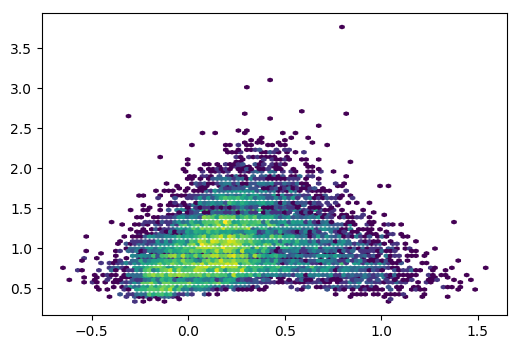

In [20]:
plt.hexbin(xm_data['lnM'][all_cuts_boolmask], scaled_mass_err, bins='log', mincnt=1)
#plt.ylabel('e_lnM')
#kplt.xlabel('lnM')
#kplt.title('Data quality cuts applied and pristine RC stars only (from YS)')

In [15]:
print(np.median(xm_data['FE_H_ERR'][all_cuts_boolmask]))  # median Fe/H erro

0.0081631076